In [1]:
%matplotlib inline
import pandas as pd

In [2]:
tit = pd.read_csv('titles.csv')
tit.head()

,title,year
0,The Rising Son,1990
1,The Thousand Plane Raid,1969
2,Crucea de piatra,1993
3,Country,2000
4,Gaiking II,2011


In [81]:
tit[tit.title.str.contains("Closet Monster")]

,title,year
61281,Closet Monster,2015


In [88]:
tit.title.value_counts().sort_values().sum()

230621

In [3]:
cast = pd.read_csv('cast.csv')
cast.head()

,title,year,name,type,character,n
0,Closet Monster,2015,Buffy #1,actor,Buffy 4,NaN
1,Suuri illusioni,1985,Homo $,actor,Guests,22.0
2,Battle of the Sexes,2017,$hutter,actor,Bobby Riggs Fan,10.0
3,Secret in Their Eyes,2015,$hutter,actor,2002 Dodger Fan,NaN
4,Steve Jobs,2015,$hutter,actor,1988 Opera House Patron,NaN


### What are the ten most common movie names of all time?

In [11]:
cast.title.value_counts()[0:10]

Around the World in Eighty Days       1298
7 cajas                                689
Thelma                                 580
The Ten Commandments                   533
The Eschatrilogy: Book of the Dead     517
Catching Faith                         493
The Dark Knight Rises                  452
Welcome to Essex                       448
Cockneys vs Zombies                    437
The Buccaneer                          436
Name: title, dtype: int64

In [12]:
list(cast.title.value_counts().index[0:10])

['Around the World in Eighty Days',
 '7 cajas',
 'Thelma',
 'The Ten Commandments',
 'The Eschatrilogy: Book of the Dead',
 'Catching Faith',
 'The Dark Knight Rises',
 'Welcome to Essex',
 'Cockneys vs Zombies',
 'The Buccaneer']

### Which three years of the 1930s saw the most films released?

In [67]:
tit.sort_values("year").year.value_counts()[[x for x in range(1930,1940)]]

1930     819
1931     885
1932     935
1933     894
1934     965
1935    1050
1936    1139
1937    1194
1938    1127
1939    1074
Name: year, dtype: int64

In [72]:
list(tit.sort_values("year").year.value_counts()[[x for x in range(1930,1940)]].sort_values(ascending=False).index[:3])

[1937, 1936, 1938]

### Plot the number of films that have been released each decade over the history of cinema.

In [103]:
(tit.year//10*10).value_counts()

2010    66703
2000    38636
1990    22189
1980    20195
1970    18646
1960    17474
1950    12656
1930    10082
1920     8783
1940     8539
1910     6498
2020      180
1900       37
1890        3
Name: year, dtype: int64

<AxesSubplot:>

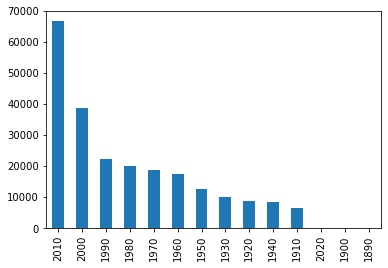

In [102]:
(tit.year//10*10).value_counts().plot.bar()

### Plot the number of "Hamlet" films made each decade.

In [113]:
tit2=tit.copy()
tit2["decade"]=(tit.year//10*10)
tit2

,title,year,decade
0,The Rising Son,1990,1990
1,The Thousand Plane Raid,1969,1960
2,Crucea de piatra,1993,1990
3,Country,2000,2000
4,Gaiking II,2011,2010
...,...,...,...
230616,Nobody Waved Good-bye,1964,1960
230617,E yue,2005,2000
230618,Lakota Girls,2015,2010
230619,Kroniki domowe,1997,1990


In [118]:
tit.shape

(230621, 2)

In [133]:
grpd=tit2[tit2.title=="Hamlet"].groupby("decade")

In [142]:
for name,grp in grpd:
    #print(name)
    print(grp)

         title  year  decade
46365   Hamlet  1910    1910
165217  Hamlet  1913    1910
208366  Hamlet  1911    1910
        title  year  decade
97869  Hamlet  1921    1920
       title  year  decade
5969  Hamlet  1948    1940
         title  year  decade
127468  Hamlet  1954    1950
         title  year  decade
121837  Hamlet  1969    1960
181662  Hamlet  1964    1960
         title  year  decade
91506   Hamlet  1976    1970
219855  Hamlet  1973    1970
        title  year  decade
93696  Hamlet  1987    1980
         title  year  decade
45010   Hamlet  1990    1990
199837  Hamlet  1996    1990
         title  year  decade
93894   Hamlet  2000    2000
174816  Hamlet  2009    2000
         title  year  decade
102208  Hamlet  2011    2010
167748  Hamlet  2015    2010
221923  Hamlet  2014    2010


<AxesSubplot:>

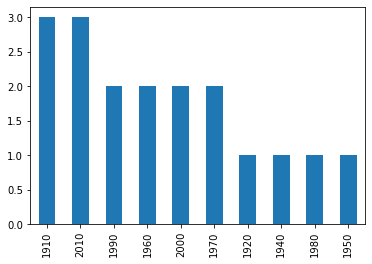

In [159]:
tit2[tit2.title=="Hamlet"]["decade"].value_counts().plot.bar()

### Plot the number of "Rustler" characters in each decade of the history of film.

<AxesSubplot:>

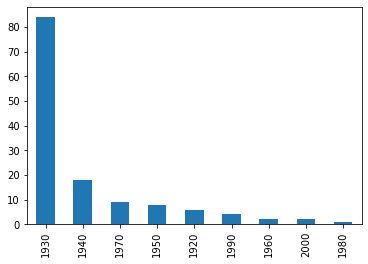

In [168]:
(cast[cast.character=="Rustler"].year//10*10).value_counts().plot.bar()

### Plot the number of "Hamlet" characters each decade.

<AxesSubplot:>

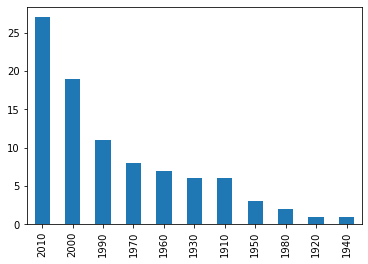

In [169]:
(cast[cast.character=="Hamlet"].year//10*10).value_counts().plot.bar()

### What are the 11 most common character names in movie history?

In [175]:
cast["character"].value_counts()[0:11]

Himself        19486
Dancer         11995
Extra          10887
Reporter        8127
Doctor          7402
Student         7146
Policeman       6855
Party Guest     6718
Nurse           6637
Bartender       6583
Minor Role      6219
Name: character, dtype: int64

In [177]:
list(cast["character"].value_counts()[0:11].index)

['Himself',
 'Dancer',
 'Extra',
 'Reporter',
 'Doctor',
 'Student',
 'Policeman',
 'Party Guest',
 'Nurse',
 'Bartender',
 'Minor Role']

### Who are the 10 people most often credited as "Herself" in film history?

In [180]:
cast[cast.character=="Herself"].name.value_counts()[0:10]

Queen Elizabeth II    11
Joyce Brothers         9
Mary Jo Pehl           7
Margaret Thatcher      7
Hillary Clinton        6
Joan Rivers            6
Marilyn Monroe         5
Caroline Rhea          5
Bunny Yeager           5
Rekha                  5
Name: name, dtype: int64

In [181]:
list(cast[cast.character=="Herself"].name.value_counts()[0:10].index)

['Queen Elizabeth II',
 'Joyce Brothers',
 'Mary Jo Pehl',
 'Margaret Thatcher',
 'Hillary Clinton',
 'Joan Rivers',
 'Marilyn Monroe',
 'Caroline Rhea',
 'Bunny Yeager',
 'Rekha']

### Who are the 10 people most often credited as "Himself" in film history?

In [182]:
cast[cast.character=="Himself"].name.value_counts()[0:10]

Adolf Hitler             99
Richard Nixon            45
Ronald Reagan            39
John F. Kennedy          33
Ron Jeremy               23
Winston Churchill        23
George W. Bush           23
Benito Mussolini         22
Franklin D. Roosevelt    20
Martin Luther King       20
Name: name, dtype: int64

In [183]:
list(cast[cast.character=="Himself"].name.value_counts()[0:10].index)

['Adolf Hitler',
 'Richard Nixon',
 'Ronald Reagan',
 'John F. Kennedy',
 'Ron Jeremy',
 'Winston Churchill',
 'George W. Bush',
 'Benito Mussolini',
 'Franklin D. Roosevelt',
 'Martin Luther King']

### Which actors or actresses appeared in the most movies in the year 1945?

In [186]:
cast[cast.year==1945].type.value_counts()#actor appeared in most movies during 1945

actor      13508
actress     4867
Name: type, dtype: int64

### Which actors or actresses appeared in the most movies in the year 1985?

In [187]:
cast[cast.year==1985].type.value_counts()#actor appeared in most movies during 1945

actor      19167
actress     8705
Name: type, dtype: int64

### Plot how many roles Mammootty has played in each year of his career.

In [209]:
import matplotlib.pyplot as plt
%matplotlib inline

<AxesSubplot:xlabel='year'>

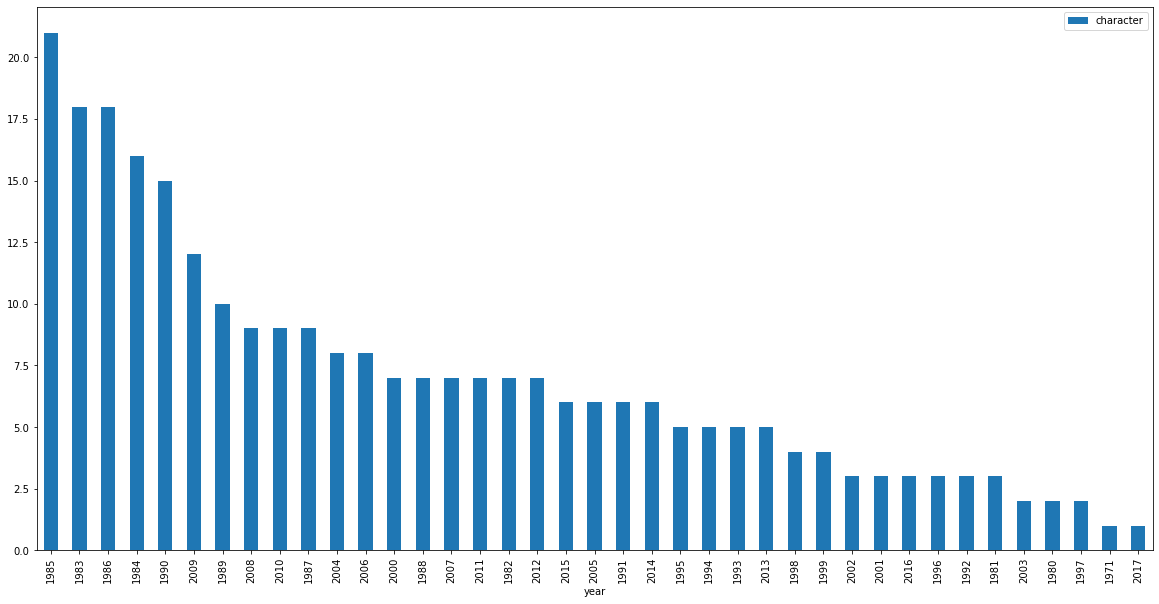

In [219]:

cast[cast.name=="Mammootty"][["year","character"]].groupby("year").count().sort_values("character",ascending=False).plot.bar(figsize=(20,10))

### What are the 10 most frequent roles that start with the phrase "Patron in"?

In [225]:
cast[cast.character.str.contains("Patron in")].character.value_counts()[:10]

Patron in Frisky Rabbit         16
Patron in the Coffee House       9
Patron in Chinese Restaurant     9
Patron in Billiard Parlor        5
Patron in Bar                    4
Patron in restaurant             4
Patron in Club                   3
Patron in cabaret                3
Patron in Restaurant             3
Movie Patron in Trailer          2
Name: character, dtype: int64

In [227]:
list(cast[cast.character.str.contains("Patron in")].character.value_counts()[:10].index)

['Patron in Frisky Rabbit',
 'Patron in the Coffee House',
 'Patron in Chinese Restaurant',
 'Patron in Billiard Parlor',
 'Patron in Bar',
 'Patron in restaurant',
 'Patron in Club',
 'Patron in cabaret',
 'Patron in Restaurant',
 'Movie Patron in Trailer']

### What are the 10 most frequent roles that start with the word "Science"?

In [228]:
cast[cast.character.str.contains("Science")].character.value_counts()[:10]

Science Teacher                            60
Science Fair Student                        9
Science Student                             9
The Science Fair Contestants & Families     9
Science Fair Judge                          6
Science Kid                                 6
Science Promo Cadet                         5
Science Reporter                            5
Science Club Member                         5
Science                                     4
Name: character, dtype: int64

In [229]:
list(cast[cast.character.str.contains("Science")].character.value_counts()[:10].index)

['Science Teacher',
 'Science Fair Student',
 'Science Student',
 'The Science Fair Contestants & Families',
 'Science Fair Judge',
 'Science Kid',
 'Science Promo Cadet',
 'Science Reporter',
 'Science Club Member',
 'Science']

### Plot the n-values of the roles that Judi Dench has played over her career.

<AxesSubplot:xlabel='character'>

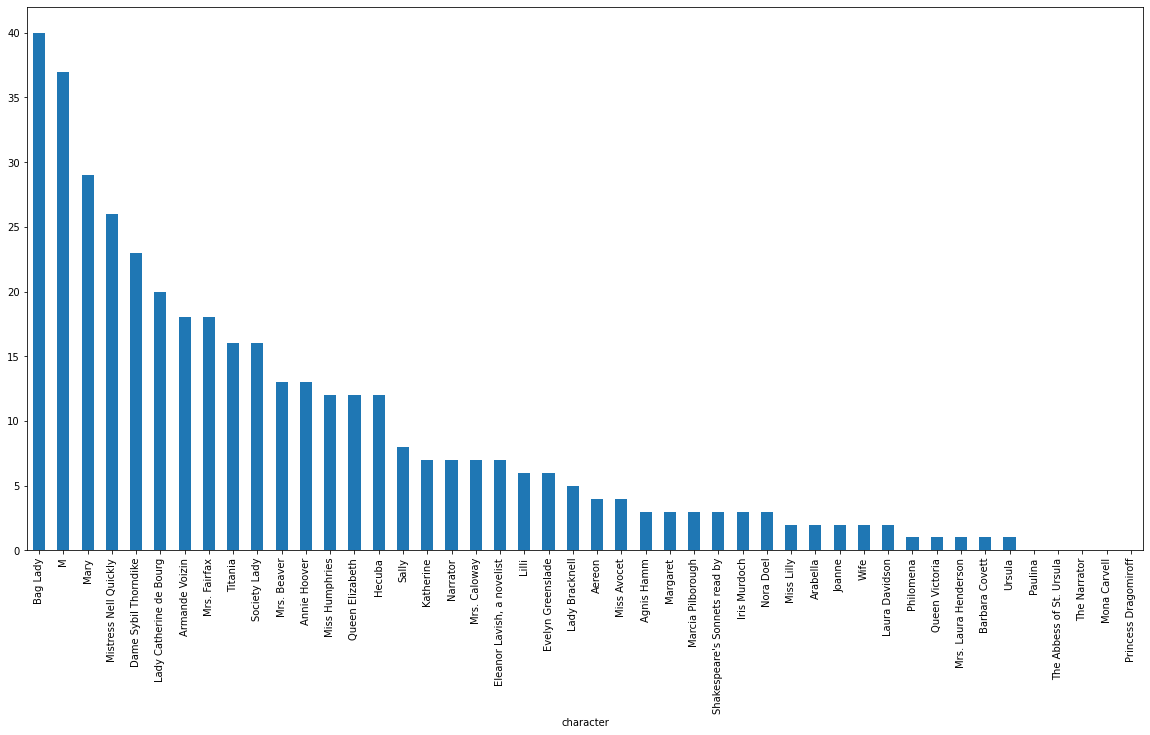

In [247]:
cast[cast.name=="Judi Dench"][["character","n"]].groupby("character")["n"].sum().sort_values(ascending=False).plot.bar(figsize=(20,10))

### Plot the n-values of Cary Grant's roles through his career.

<AxesSubplot:xlabel='character'>

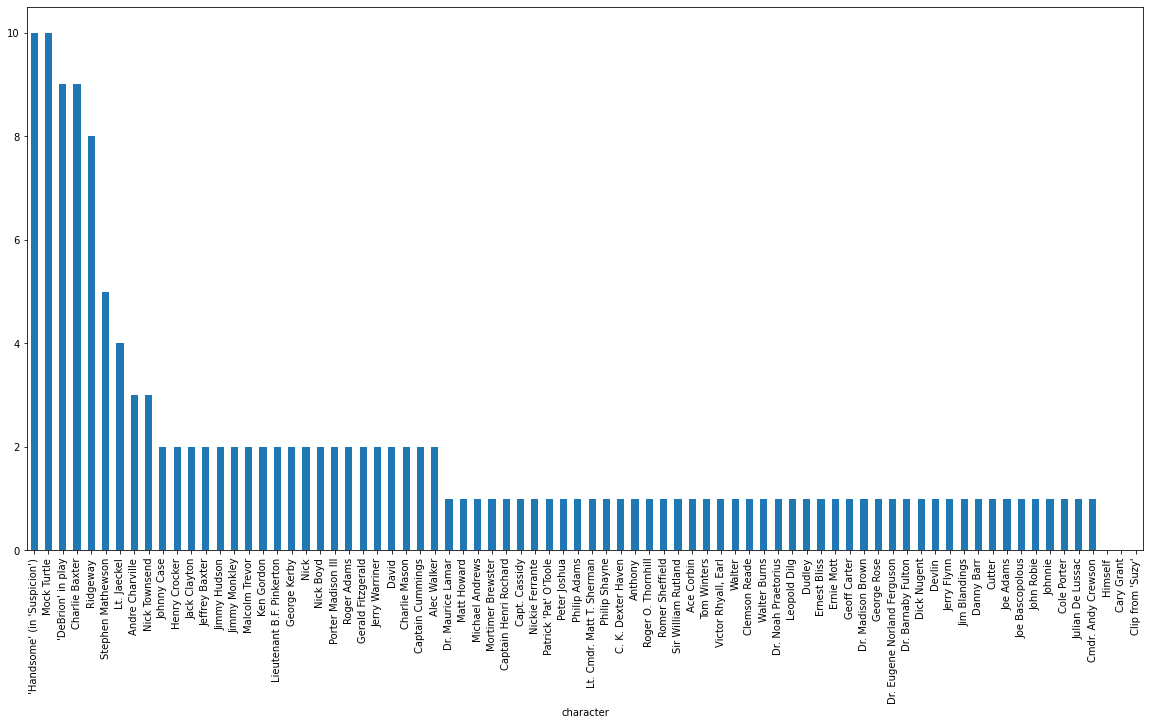

In [250]:
cast[cast.name=="Cary Grant"][["character","n"]].groupby("character")["n"].sum().sort_values(ascending=False).plot.bar(figsize=(20,10))

### Plot the n-value of the roles that Sidney Poitier has acted over the years.

<AxesSubplot:xlabel='character'>

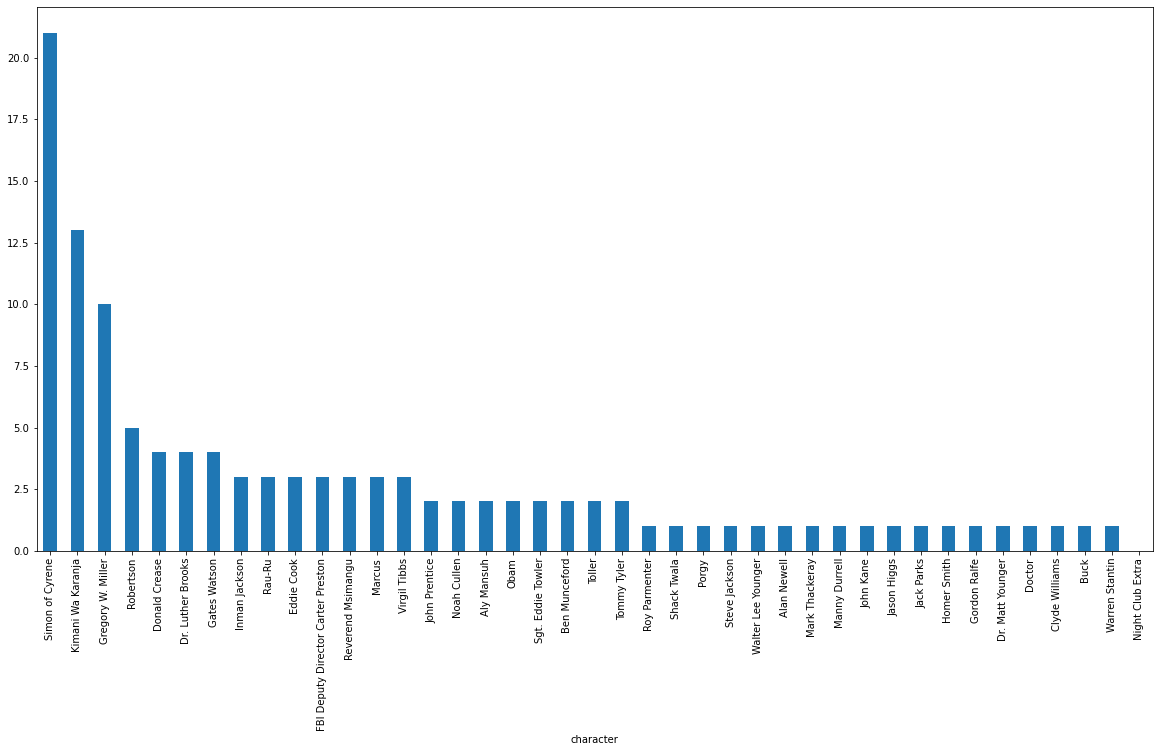

In [253]:
cast[cast.name=="Sidney Poitier"][["character","n"]].groupby("character")["n"].sum().sort_values(ascending=False).plot.bar(figsize=(20,10))

### How many leading (n=1) roles were available to actors, and how many to actresses, in the 1950s?

In [262]:
cast[(cast.n==1) & (cast.year==1950)].groupby("type").count()["n"].to_dict()

{'actor': 621, 'actress': 279}

### How many supporting (n=2) roles were available to actors, and how many to actresses, in the 1950s?

In [263]:
cast[(cast.n==2) & (cast.year==1950)].groupby("type").count()["n"].to_dict()

{'actor': 433, 'actress': 412}